# SMS Spam Collection Dataset

### Imports

In [2]:
import csv
import pandas as pd
import numpy as np
import io
import json
import string
import itertools
from __future__ import print_function


/home/nihira/anaconda2/envs/py36/lib/python3.6/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [3]:

df = pd.read_json('yelp_academic_dataset_business.json', orient='columns', lines='true')


In [39]:
df.head()
df.tail()

,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
188588,"8000 McKnight Rd, Ste 570","{'AcceptsInsurance': 'False', 'BusinessAccepts...",sMQAZ3DkfrURFoJAyOhjEw,"Skin Care, Beauty & Spas, Day Spas, Massage",Pittsburgh,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",0,40.551152,-80.021213,Ross Massage,,15237,9,2.5,PA
188589,3341 Babcock Blvd,None,6hvuCibNS4uECetHb9MCQQ,"Fashion, Women's Clothing, Accessories, Bridal...",Pittsburgh,None,1,40.534242,-80.019556,Four Seasons Boutique,,15237,5,2.0,PA
188590,5825 Thunder Rd,"{'BikeParking': 'True', 'BusinessAcceptsCredit...",KleCXFYOmdACcQUvf6_XEg,"Mobile Phones, Shopping, Department Stores, Fo...",Concord,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,35.378669,-80.724733,Walmart Supercenter,,28027,26,3.0,NC
188591,7601 Scott Padgett Pkwy,"{'BusinessAcceptsCreditCards': 'True', 'DogsAl...",3_fIsSxN2RBovQ_6EFtLzA,"Event Planning & Services, Hotels & Travel, Ho...",Concord,"{'Monday': '0:0-0:0', 'Tuesday': '0:0-0:0', 'W...",1,35.364366,-80.703454,Residence Inn Charlotte Concord,,28027,19,4.0,NC
188592,"3900 Paradise Rd, Ste R","{'BikeParking': 'True', 'BusinessAcceptsCredit...",NkOvIueadjFUxeCyq_uQEw,"Makeup Artists, Men's Clothing, Swimwear, Shop...",Las Vegas,"{'Tuesday': '11:0-19:0', 'Wednesday': '11:0-19...",1,36.118697,-115.154269,Tito Jimy Salon and Boutique,Eastside,89169,8,4.0,NV


In [42]:
categories = df.categories.unique()

In [43]:
categories.shape

(85057,)

In [46]:
categories[1:50]

array(['Chicken Wings, Burgers, Caterers, Street Vendors, Barbeque, Food Trucks, Food, Restaurants, Event Planning & Services',
       'Breakfast & Brunch, Restaurants, French, Sandwiches, Cafes',
       'Insurance, Financial Services',
       'Home & Garden, Nurseries & Gardening, Shopping, Local Services, Automotive, Electronics Repair',
       'Coffee & Tea, Food', 'Food, Bakeries', 'Restaurants, Thai',
       'Mexican, Restaurants', 'Flowers & Gifts, Gift Shops, Shopping',
       'Restaurants, Japanese', 'Cajun/Creole, Southern, Restaurants',
       'Bars, Sports Bars, Dive Bars, Burgers, Nightlife, Sandwiches, Restaurants',
       'Restaurants, Pakistani, Indian, Middle Eastern',
       'Beauty & Spas, Barbers', 'Delis, Restaurants, Sandwiches',
       'Nightlife, Bars, American (Traditional), Tapas/Small Plates, Poutineries, Supper Clubs, Restaurants, Tapas Bars',
       'Shopping, Fashion, Department Stores',
       'Financial Services, Check Cashing/Pay-day Loans, Title Loans',

In [47]:
subset = df[df['categories'].str.contains("Restaurant")==True]

### Reading the created csv file

In [48]:
subset.shape

(57191, 15)

In [52]:
subset.categories

0         Tours, Breweries, Pizza, Restaurants, Food, Ho...
1         Chicken Wings, Burgers, Caterers, Street Vendo...
2         Breakfast & Brunch, Restaurants, French, Sandw...
7                                         Restaurants, Thai
8                                      Mexican, Restaurants
10                                    Restaurants, Japanese
11                      Cajun/Creole, Southern, Restaurants
12        Bars, Sports Bars, Dive Bars, Burgers, Nightli...
13           Restaurants, Pakistani, Indian, Middle Eastern
15                           Delis, Restaurants, Sandwiches
16        Nightlife, Bars, American (Traditional), Tapas...
19        American (Traditional), Food, Bakeries, Restau...
21                          Fast Food, Burgers, Restaurants
22        Nightlife, Bars, American (Traditional), Sport...
24                                     Mexican, Restaurants
25                                     Mexican, Restaurants
27          Restaurants, Food, Canadian 

In [53]:
df2 = subset.sort_values(by=['review_count'])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fd01b85e048>]],
      dtype=object)

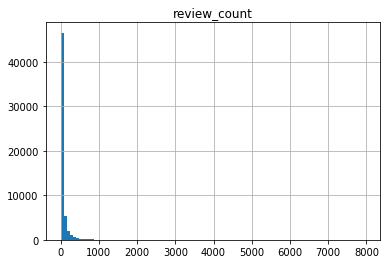

In [55]:
df2.hist(column='review_count', bins=100)

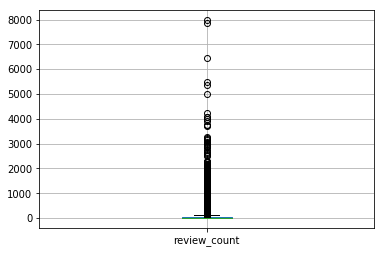

In [56]:
df2.boxplot(column='review_count')

In [57]:
sum(df2['review_count']>0)

57191

In [58]:
sum(df2['review_count']>10)

37438

In [59]:
sum(df2['review_count']>50)

16015

In [60]:
sum(df2['review_count']>100)

8850

In [61]:
sum(df2['review_count']>1000)

249

In [62]:
sum(df2['review_count']>1500)

89

In [63]:
sum(df2['review_count']>2000)

50

In [64]:
sum(df2['review_count']>2500)

31

In [65]:
sum(df2['review_count']>3000)

21

In [66]:
sum(df2['review_count']>3500)

14

In [67]:
sum(df2['review_count']>3800)

11

In [69]:
np.histogram(df2['review_count'])

(array([56786,   326,    47,    15,     8,     3,     3,     0,     1,
            2]),
 array([3.0000e+00, 7.9950e+02, 1.5960e+03, 2.3925e+03, 3.1890e+03,
        3.9855e+03, 4.7820e+03, 5.5785e+03, 6.3750e+03, 7.1715e+03,
        7.9680e+03]))

In [70]:
df3 = df2[df2['review_count']>100]

In [71]:
df3.shape

(8850, 15)

In [91]:
sampleBusiness = df3.sample(n=180, random_state=0)

In [92]:
sum(sampleBusiness['review_count'])

50219

In [98]:
businessIds = sampleBusiness['business_id'].tolist()

In [104]:
sampleReview = pd.DataFrame(columns=['review_id', 'user_id', 'business_id', 'stars', 'date', 'text', 'useful', 'funny', 'cool'])
count = 0
with open('yelp_academic_dataset_review.json', 'r') as f:
    for i, line in enumerate(f, start=1):
        if not (i % 10000):
            print(f'Parsed {i} lines')
        line_data = json.loads(line)
        if(line_data['business_id'] in businessIds):
            sampleReview.loc[count] = line_data
            count = count + 1
        

Parsed 10000 lines
Parsed 20000 lines
Parsed 30000 lines
Parsed 40000 lines
Parsed 50000 lines
Parsed 60000 lines
Parsed 70000 lines
Parsed 80000 lines
Parsed 90000 lines
Parsed 100000 lines
Parsed 110000 lines
Parsed 120000 lines
Parsed 130000 lines
Parsed 140000 lines
Parsed 150000 lines
Parsed 160000 lines
Parsed 170000 lines
Parsed 180000 lines
Parsed 190000 lines
Parsed 200000 lines
Parsed 210000 lines
Parsed 220000 lines
Parsed 230000 lines
Parsed 240000 lines
Parsed 250000 lines
Parsed 260000 lines
Parsed 270000 lines
Parsed 280000 lines
Parsed 290000 lines
Parsed 300000 lines
Parsed 310000 lines
Parsed 320000 lines
Parsed 330000 lines
Parsed 340000 lines
Parsed 350000 lines
Parsed 360000 lines
Parsed 370000 lines
Parsed 380000 lines
Parsed 390000 lines
Parsed 400000 lines
Parsed 410000 lines
Parsed 420000 lines
Parsed 430000 lines
Parsed 440000 lines
Parsed 450000 lines
Parsed 460000 lines
Parsed 470000 lines
Parsed 480000 lines
Parsed 490000 lines
Parsed 500000 lines
Parsed 51

Parsed 3970000 lines
Parsed 3980000 lines
Parsed 3990000 lines
Parsed 4000000 lines
Parsed 4010000 lines
Parsed 4020000 lines
Parsed 4030000 lines
Parsed 4040000 lines
Parsed 4050000 lines
Parsed 4060000 lines
Parsed 4070000 lines
Parsed 4080000 lines
Parsed 4090000 lines
Parsed 4100000 lines
Parsed 4110000 lines
Parsed 4120000 lines
Parsed 4130000 lines
Parsed 4140000 lines
Parsed 4150000 lines
Parsed 4160000 lines
Parsed 4170000 lines
Parsed 4180000 lines
Parsed 4190000 lines
Parsed 4200000 lines
Parsed 4210000 lines
Parsed 4220000 lines
Parsed 4230000 lines
Parsed 4240000 lines
Parsed 4250000 lines
Parsed 4260000 lines
Parsed 4270000 lines
Parsed 4280000 lines
Parsed 4290000 lines
Parsed 4300000 lines
Parsed 4310000 lines
Parsed 4320000 lines
Parsed 4330000 lines
Parsed 4340000 lines
Parsed 4350000 lines
Parsed 4360000 lines
Parsed 4370000 lines
Parsed 4380000 lines
Parsed 4390000 lines
Parsed 4400000 lines
Parsed 4410000 lines
Parsed 4420000 lines
Parsed 4430000 lines
Parsed 444000

In [112]:
sampleReviews = sampleReview

In [113]:
sampleReviews.shape

(50218, 9)

In [115]:
sampleReviews.head()

,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,jsDu6QEJHbwP2Blom1PLCA,msQe1u7Z_XuqjGoqhB0J5g,Ums3gaP2qM3W1XcA5r6SsQ,5,2014-09-05,Delicious healthy food. The steak is amazing. ...,0,0,0
1,5k9F53Lanw09xR3nwCdRYg,Yy_iGXxLpL6tYDQoE-6XVg,7wHLFohwCw8l6WS-feLjeg,5,2017-04-05,I had an amazing time here. They were very bus...,1,0,1
2,4KbJXuf8H2pGQnUatmc1LQ,OQT9DjfBrzrwOEdVJjuYIA,--cZ6Hhc9F7VkKXxHMVZSQ,5,2012-12-19,Our family of five got the Latin Combo-- full ...,1,0,0
3,Cn6gKCsMCjapKE0AaPAWBA,AuIK5tF2GjO7SftHawTLKw,Gaq3S9lmjXVcuDCZ8ulppw,5,2009-08-06,I just love sushi so I'm biased when it comes ...,0,0,0
4,fKPRKvImyawPSPw_5ie12A,UGW-9bbBEB3eP1o6mWD_WA,TgcjQfl1E9DE-SjDVOUDJQ,3,2013-07-23,The space is very small but it's nice for grou...,2,0,1


In [116]:
userIds = sampleReviews['user_id'].tolist()

In [117]:
sampleUsers = pd.DataFrame(columns=['user_id', 'name', 'review_count', 'yelping_since', 'friends', 'useful', 'funny', 'cool', 'fans', 'elite', 'average_stars', 'compliment_hot', 'compliment_more', 'compliment_profile', 'compliment_cute', 'compliment_list', 'compliment_note', 'compliment_plain', 'compliment_cool', 'compliment_funny', 'compliment_writer', 'compliment_photos'])
count = 0
with open('yelp_academic_dataset_user.json', 'r') as f:
    for i, line in enumerate(f, start=1):
        if not (i % 10000):
            print(f'Parsed {i} lines')
        line_data = json.loads(line)
        if(line_data['user_id'] in userIds):
            sampleUsers.loc[count] = line_data
            count = count + 1
        

Parsed 10000 lines
Parsed 20000 lines
Parsed 30000 lines
Parsed 40000 lines
Parsed 50000 lines
Parsed 60000 lines
Parsed 70000 lines
Parsed 80000 lines
Parsed 90000 lines
Parsed 100000 lines
Parsed 110000 lines
Parsed 120000 lines
Parsed 130000 lines
Parsed 140000 lines
Parsed 150000 lines
Parsed 160000 lines
Parsed 170000 lines
Parsed 180000 lines
Parsed 190000 lines
Parsed 200000 lines
Parsed 210000 lines
Parsed 220000 lines
Parsed 230000 lines
Parsed 240000 lines
Parsed 250000 lines
Parsed 260000 lines
Parsed 270000 lines
Parsed 280000 lines
Parsed 290000 lines
Parsed 300000 lines
Parsed 310000 lines
Parsed 320000 lines
Parsed 330000 lines
Parsed 340000 lines
Parsed 350000 lines
Parsed 360000 lines
Parsed 370000 lines
Parsed 380000 lines
Parsed 390000 lines
Parsed 400000 lines
Parsed 410000 lines
Parsed 420000 lines
Parsed 430000 lines
Parsed 440000 lines
Parsed 450000 lines
Parsed 460000 lines
Parsed 470000 lines
Parsed 480000 lines
Parsed 490000 lines
Parsed 500000 lines
Parsed 51

In [118]:
sampleUsers.shape

(43332, 22)

In [119]:
sampleUsers.head()

,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,elite,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,DMJfDuXSswX9Gyt1UcmJpw,Leo,2,2015-08-21,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
1,N8rnN-vBSKICcTMlhLgNOw,Bingo,18,2014-01-27,None,7,2,2,0,None,...,0,0,0,0,0,0,0,0,0,0
2,3iNM5vT33PhjmXC7jglusw,Brian,6,2013-05-31,None,0,1,0,0,None,...,0,0,0,0,0,0,0,0,0,0
3,SS5qLDpUkrHmvvlMTo0KCw,Rick,4,2015-05-25,None,0,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0
4,e_S4E7aa7k47YrDsui_XGA,Susan,14,2013-09-10,None,2,0,0,0,None,...,0,0,0,0,0,0,0,0,0,0


In [120]:
sampleUsers.to_csv("sample_users.csv")

In [121]:
sampleReviews.to_csv("sample_reviews.csv")

In [122]:
sampleBusiness.to_csv("sample_business.csv")

In [123]:

samB = pd.read_csv('sample_business.csv')


In [124]:
samB.shape

(180, 16)

In [129]:
samB.head()

,Unnamed: 0,address,attributes,business_id,categories,city,hours,is_open,latitude,longitude,name,neighborhood,postal_code,review_count,stars,state
0,123605,"2293 N Pebble Creek Pkwy, Ste 101","{'Alcohol': 'beer_and_wine', 'Ambience': ""{'ro...",qUPUCcBbn-ugXFSItXLmGw,"Restaurants, Sushi Bars, Japanese",Goodyear,"{'Monday': '16:0-21:0', 'Tuesday': '16:0-21:0'...",1,33.472091,-112.392014,Akai Hana Sushi & Grill,NaN,85338,188,3.5,AZ
1,89591,"775 W Craig Rd, Ste 148","{'Alcohol': 'none', 'Ambience': ""{'romantic': ...",HK2Ki-PvnNN-YMTlX1uSVA,"Hawaiian, Restaurants",North Las Vegas,"{'Monday': '10:0-21:0', 'Tuesday': '10:0-21:0'...",0,36.237945,-115.152312,808 Hawaii Mixed Plate,NaN,89032,444,4.0,NV
2,140720,3600 S Las Vegas Blvd,"{'Alcohol': 'none', 'Ambience': ""{'romantic': ...",UUGoM4q4i8rK2CBRS0xDAw,"Food, Coffee & Tea, Restaurants, Desserts, Cafes",Las Vegas,"{'Monday': '6:0-23:0', 'Tuesday': '6:0-23:0', ...",0,36.111946,-115.176877,Jean Philippe Patisserie,The Strip,89109,1222,4.0,NV
3,160915,69 Yorkville Avenue,"{'Alcohol': 'full_bar', 'Ambience': ""{'romanti...",BJ9GwNMo8vIgSuKc6B_mOw,"Restaurants, Dim Sum, Chinese",Toronto,"{'Monday': '11:0-23:0', 'Tuesday': '11:0-23:0'...",1,43.671054,-79.390955,Dynasty Chinese Cuisine,Yorkville,M5R 1B8,103,3.5,ON
4,182057,"6870 S Rainbow Blvd, Ste 101","{'Alcohol': 'none', 'Ambience': ""{'romantic': ...",kABF0hYfAEnl166mn1zR1A,"Szechuan, Chinese, Soup, Restaurants, Noodles,...",Las Vegas,"{'Monday': '11:0-21:30', 'Tuesday': '11:0-21:3...",1,36.063497,-115.241733,The Noodle Man,Spring Valley,89118,578,4.0,NV


In [125]:
samU = pd.read_csv('sample_users.csv')

In [126]:
samU.shape

(43332, 23)

In [130]:
samU.head()

,Unnamed: 0,user_id,name,review_count,yelping_since,friends,useful,funny,cool,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,0,DMJfDuXSswX9Gyt1UcmJpw,Leo,2,2015-08-21,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,N8rnN-vBSKICcTMlhLgNOw,Bingo,18,2014-01-27,None,7,2,2,0,...,0,0,0,0,0,0,0,0,0,0
2,2,3iNM5vT33PhjmXC7jglusw,Brian,6,2013-05-31,None,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,3,SS5qLDpUkrHmvvlMTo0KCw,Rick,4,2015-05-25,None,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,e_S4E7aa7k47YrDsui_XGA,Susan,14,2013-09-10,None,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [127]:
samR = pd.read_csv('sample_reviews.csv')

In [128]:
samR.shape

(50218, 10)

In [131]:
samR.head()

,Unnamed: 0,review_id,user_id,business_id,stars,date,text,useful,funny,cool
0,0,jsDu6QEJHbwP2Blom1PLCA,msQe1u7Z_XuqjGoqhB0J5g,Ums3gaP2qM3W1XcA5r6SsQ,5,2014-09-05,Delicious healthy food. The steak is amazing. ...,0,0,0
1,1,5k9F53Lanw09xR3nwCdRYg,Yy_iGXxLpL6tYDQoE-6XVg,7wHLFohwCw8l6WS-feLjeg,5,2017-04-05,I had an amazing time here. They were very bus...,1,0,1
2,2,4KbJXuf8H2pGQnUatmc1LQ,OQT9DjfBrzrwOEdVJjuYIA,--cZ6Hhc9F7VkKXxHMVZSQ,5,2012-12-19,Our family of five got the Latin Combo-- full ...,1,0,0
3,3,Cn6gKCsMCjapKE0AaPAWBA,AuIK5tF2GjO7SftHawTLKw,Gaq3S9lmjXVcuDCZ8ulppw,5,2009-08-06,I just love sushi so I'm biased when it comes ...,0,0,0
4,4,fKPRKvImyawPSPw_5ie12A,UGW-9bbBEB3eP1o6mWD_WA,TgcjQfl1E9DE-SjDVOUDJQ,3,2013-07-23,The space is very small but it's nice for grou...,2,0,1
